# Aufgabe 4: Reflektivität von beschichtetem Glas(10$\,$pt) ***

Licht einer Ebenenwelle fällt senkrecht auf eine beschichtete Glasplatte ein. 
Die Beschichtung besteht aus einer dünnen Schicht Titanoxid (TiO2) mit der Dicke $d = 40 \, \text{nm}$ und einem Brechungsindex von $n = 2,35$ ($\approx \lambda/4$ für $400 \, \text{nm}$). Der Brechungsindex der Glasplatte ist $n = 1,52$ (Kronglas).

Berechnen Sie die Intensität des reflektierten Lichtes indem Sie die Amplitude der reflektierten Welle bestimmen.
Berücksichtigen Sie dazu alle Wellen die bis zu einer genügend großen Anzahl $N$-mal reflektiert wurden.

Wie später noch gezeigt wird, gilt für die reflektierte und transmittierte Amplitude an einer Grenzschicht von Medium 1 zu Medium 2:

$$ r = \frac{E_{\text{ref}}}{E_{0}} = \frac{n_1 - n_2}{n_1 + n_2} $$

$$ t = \frac{E_{\text{trans}}}{E_{0}} = \frac{2 n_1}{n_1 + n_2} $$

Ein negatives Vorzeichen bedeutet hier einen Phasensprung von $180^{\circ}$.

Ploten Sie die Reflektivität in einem Bereich von $200 \, \text{nm}$ bis $800 \, \text{nm}$ Wellenlänge!

Warum ist das Maximum bei circa $400 \, \text{nm}$?

### Imports und Konstanten

In [1]:
import numpy as np
import matplotlib.pyplot as plt

'\nErklärung für das Maximum:\n\nTrifft ein Lichtstrahl auf die Trennfläche zwischen Luft und Beschichtung \nmit einer Phasenverschiebung von null, und ist die Dicke der Trennfläche \ngerade $\x0crac\\lambda4$  so ist die Reflektion bei Austritt aus der Beschichtung \naufgrund der zurückgelegten Strecke bei um $\\pi$ Phasenverschoben, auch die \nTransmission von $n_1$ nach $n_0$ führt zu einer Phasenverschiebung von $\\pi$, \nsodass bei dieser Konfiguration die Reflektion insgesammt um $2\\pi\nphasenverschoben ist und konstruktiv interferiert. Die $n$-te Reflektion \nist nach dem gleichem Schema um $n\\cdot 2\\pi$ phasenverschoben, es kommt \nsomit immer zur koknstruktiven Interferenz und es handelt sich um ein Maximum.\n\nDamit die Dicke der Beschichtung tatsächlich $\x0crac\\lambda4$ beträgt, müsste die gleich\n$\x0crac\\lambda{4n_1}$ betragen.\n'

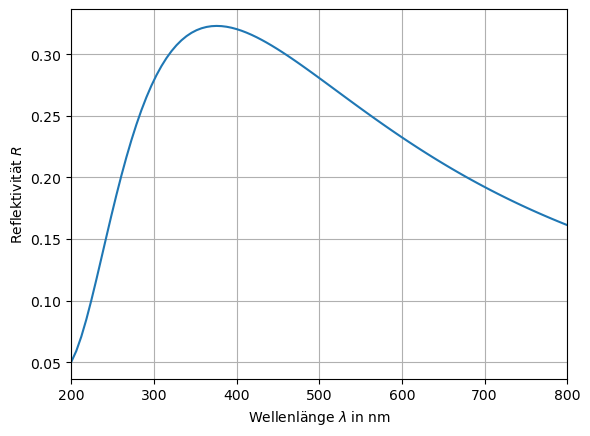

In [148]:
# Konstanten
n0 = 1 # Luft
n1 = 2.35 # TiO2
n2 = 1.52 # Kronglas
n = [n0, n1, n2]

d = 40 # [nm]

# Koeffizienten
r = lambda n1,n2: (n1-n2) / (n1+n2)
t = lambda n1,n2: -2*n1 / (n1+n2)

r1 = r(n0,n1)

# Reflektivität
def R(l, max_depth=10):
    total_R = r(n0,n1)
    curr_A = t(n0,n1)
    curr_phase = 0
    for _ in range(max_depth):
        curr_A *= r(n1,n2)
        curr_phase = (curr_phase + 4*np.pi*d/l*n1) % (2*np.pi)
        # print(curr_A*t(n1,n0) * np.cos(curr_phase))
        total_R += curr_A*t(n1,n0) * np.cos(curr_phase)
        curr_A *= r(n1,n0)
    return total_R**2

# Plot
X = np.linspace(200,800,100)
Y = [R(x) for x in X]

plt.plot(X,Y)
plt.grid()
plt.xlim(200,800)
plt.xlabel("Wellenlänge $\\lambda$ in nm")
plt.ylabel("Reflektivität $R$")

"""
Erklärung für das Maximum:

Trifft ein Lichtstrahl auf die Trennfläche zwischen Luft und Beschichtung 
mit einer Phasenverschiebung von null, und ist die Dicke der Trennfläche 
gerade $\frac\lambda4$ so ist die Reflektion bei Austritt aus der Beschichtung 
aufgrund der zurückgelegten Strecke bei um $\pi$ Phasenverschoben, auch die 
Transmission von $n_1$ nach $n_0$ führt zu einer Phasenverschiebung von $\pi$, 
sodass bei dieser Konfiguration die Reflektion insgesammt um $2\pi$
phasenverschoben ist und konstruktiv interferiert. Die $n$-te Reflektion 
ist nach dem gleichem Schema um $n\cdot 2\pi$ phasenverschoben, es kommt 
somit immer zur konstruktiven Interferenz und es handelt sich um ein Maximum.

Damit die Dicke der Beschichtung tatsächlich $\frac\lambda4$ beträgt, müsste man 
sie als $\frac\lambda{4n_1}$ wählen $(\approx 42.6 \mathrm{nm})$.
"""

### Koeffizienten

In [145]:
print(r(n1,n2),t(n1,n0),r(n1,n0))

0.2437810945273632 -1.4285714285714286 0.42857142857142855
